In [1]:
using SymPy
using LaTeXStrings

INFO: Recompiling stale cache file /Users/egor/.julia/lib/v0.4/SymPy.ji for module SymPy.


In [2]:
t = symbols("t_i", real=true);
tp1 = symbols("t_{i+1}", real=true);
tm1 = symbols("t_{i-1}", real=true);
P = symbols("p_i", real=true);
Pp1 = symbols("p_{i+1}", real=true);
Pm1 = symbols("p_{i-1}", real=true);
Pkp1 = symbols("p_{k_{i+1}}", real=true);
Pkm1 = symbols("p_{k_{i-1}}", real=true);
Pp2 = symbols("p_{i+2}", real=true);
Pm2 = symbols("p_{i-2}", real=true);
Pp3 = symbols("p_{i+3}", real=true);
Pm3 = symbols("p_{i-3}", real=true);
Pk = symbols("p_{k_i}", real=true);
a1,a2,a3,a4,a5,a6 = symbols("a_1,a_2,a_3,a_4,a_5,a_6", real=true); # temporaries
as=[a1,a2,a3,a4,a5,a6];

Solution for when $k_i = i + 1$:

In [3]:
lhs = (t*P + (1-t)*Pp1 - Pm1)^2;
rhs = (t*P - t*Pp1)^2;

In [4]:
expr = collect(simplify(expand(lhs-rhs)),t)

       2                              2       /                               
p_{i+1}  - 2*p_{i+1}*p_{i-1} + p_{i-1}  + t_i*\2*p_i*p_{i+1} - 2*p_i*p_{i-1} -

          2                    \
 2*p_{i+1}  + 2*p_{i+1}*p_{i-1}/

In [5]:
den = factor(coeff(expr,t))

2*(p_i - p_{i+1})*(p_{i+1} - p_{i-1})

In [6]:
num = simplify(expand(lhs-rhs-t*(den)))

       2                              2
p_{i+1}  - 2*p_{i+1}*p_{i-1} + p_{i-1} 

In [7]:
simplify(subs(expr,t,-num/den)) #check solution: -num/den

0

0.500186777450606

2-element Array{SymPy.Sym,1}
[ -0.58812429958456 ]
[                   ]
[-0.0020946969762754]

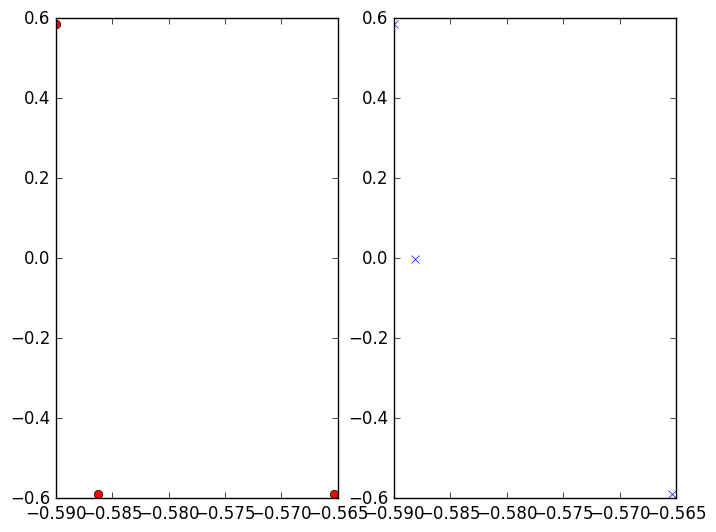

In [29]:
using PyPlot
plt = PyPlot;

#check with an example
x1 = -0.565313;
y1 = -0.59;
x2 = -0.58625;
y2 = -0.59;
x3 = -0.59;
y3 = 0.58625;

# solve for p2, expected sol'n: t = 1/(1+sqrt(2)) = 0.41, p2 = [1/sqrt(2), 1/sqrt(2)]
res = solve(subs(subs(subs(expr,Pm1,x1),P,x2),Pp1,x3)
+ subs(subs(subs(expr,Pm1,y1),P,y2),Pp1,y3),t)[1];
display(res)
newx = [res*x2+(1-res)*x3,res*y2 + (1-res)*y3];
display(newx);

plt.subplot(1, 2, 1)
plt.plot([x1,x2,x3], [y1,y2,y3], "or")
plt.subplot(1, 2, 2)
plt.plot([x1,Float64(newx[1]),x3], [y1,Float64(newx[2]),y3], "x")
plt.show()


Solution for when $k_i = i - 1$:

In [324]:
lhs = (t*P + (1-t)*Pm1 - Pp1)^2;
rhs = (t*P - t*Pm1)^2;

In [325]:
expr = collect(simplify(expand(lhs-rhs)),t)

       2                              2       /                               
p_{i+1}  - 2*p_{i+1}*p_{i-1} + p_{i-1}  + t_i*\-2*p_i*p_{i+1} + 2*p_i*p_{i-1} 

                               2\
+ 2*p_{i+1}*p_{i-1} - 2*p_{i-1} /

In [326]:
den = factor(coeff(expr,t))

-2*(p_i - p_{i-1})*(p_{i+1} - p_{i-1})

In [327]:
num = simplify(expand(lhs-rhs-t*(den)))

       2                              2
p_{i+1}  - 2*p_{i+1}*p_{i-1} + p_{i-1} 

In [328]:
simplify(subs(expr,t,-num/den)) #check solution: -num/den

0

Harder constraints

In [227]:
x = t*P + (1-t)*Pk;
xp1 = tp1*Pp1 + (1-tp1)*Pkp1;
xm1 = tm1*Pm1 + (1-tm1)*Pkm1;

In [228]:
c = (x-xp1)^2 - (x-xm1)^2;

In [229]:
expr = simplify(expand(c))

                                                                              
-2*p_i*p_{i+1}*t_i*t_{i+1} + 2*p_i*p_{i-1}*t_i*t_{i-1} + 2*p_i*p_{k_{i+1}}*t_i

                                                                              
*t_{i+1} - 2*p_i*p_{k_{i+1}}*t_i - 2*p_i*p_{k_{i-1}}*t_i*t_{i-1} + 2*p_i*p_{k_

                    2        2                                                
{i-1}}*t_i + p_{i+1} *t_{i+1}  + 2*p_{i+1}*p_{k_i}*t_i*t_{i+1} - 2*p_{i+1}*p_{

                                            2                                 
k_i}*t_{i+1} - 2*p_{i+1}*p_{k_{i+1}}*t_{i+1}  + 2*p_{i+1}*p_{k_{i+1}}*t_{i+1} 

         2        2                                                           
- p_{i-1} *t_{i-1}  - 2*p_{i-1}*p_{k_i}*t_i*t_{i-1} + 2*p_{i-1}*p_{k_i}*t_{i-1

                                 2                                            
} + 2*p_{i-1}*p_{k_{i-1}}*t_{i-1}  - 2*p_{i-1}*p_{k_{i-1}}*t_{i-1} - 2*p_{k_i}

                                              

Breaking it down into cases for $p_{k_i}$, $p_{k_{i+1}}$, and $p_{k_{i-1}}$: 

In [238]:
pk_l = [Pp1, Pm1];
pkp1_l = [P,Pp2];
pkm1_l = [P,Pm2];
allps = [Pm3,Pm2,Pm1,P,Pp1,Pp2,Pp3];

In [261]:
Dii = symbols("D_{i,i}", real=true);
Dip1i = symbols("D_{i+1,i}", real=true);
Diim1 = symbols("D_{i,i-1}", real=true);
function prev_expr(expr)
    ps = allps[2:end];
    psm1 = allps[1:end-1];
    subs(subs(expr,zip(ps,as)...),zip(as,psm1)...)
end
function next_expr(expr)
    ps = allps[1:end-1];
    psp1 = allps[2:end];
    subs(subs(expr,zip(ps,as)...),zip(as,psp1)...)
end
for a in pk_l
    x1 = subs(expr,Pk, a);
    for b in pkp1_l
        x2 = subs(x1,Pkp1, b);
        for c in pkm1_l
            x3 = subs(x2,Pkm1, c);
            x4 = simplify(x3);
            display(x4);
            Dii1 = coeff(collect(x4,t^2),t^2);
            Dim1im1 = coeff(collect(x4,tm1^2),tm1^2);
            Dip1ip1 = coeff(collect(x4,tp1^2),tp1^2);
            Dii2 = Dii1 + next_expr(Dim1im1) + prev_expr(Dip1ip1);
            
            Dip1i = coeff(collect(x4,t*tp1),t*tp1);
            Dim1i = coeff(collect(x4,t*tm1),t*tm1);
            Dip1inew = Dip1i + next_expr(Dim1i);
            display(Dip1i);
            display(Dim1i);
            display(Dii);
            println(".");
        end
    end
end

     2                    2                  2        2        2              
2*p_i *t_i*t_{i+1} - 2*p_i *t_i*t_{i-1} + p_i *t_{i+1}  - 2*p_i *t_{i+1} - p_i

2        2        2                                                           
 *t_{i-1}  + 2*p_i *t_{i-1} - 4*p_i*p_{i+1}*t_i*t_{i+1} + 2*p_i*p_{i+1}*t_i*t_

                             2                                                
{i-1} - 2*p_i*p_{i+1}*t_{i+1}  + 4*p_i*p_{i+1}*t_{i+1} - 2*p_i*p_{i+1}*t_{i-1}

                                                    2                         
 + 2*p_i*p_{i-1}*t_i*t_{i-1} + 2*p_i*p_{i-1}*t_{i-1}  - 2*p_i*p_{i-1}*t_{i-1} 

           2                      2        2            2                     
+ 2*p_{i+1} *t_i*t_{i+1} + p_{i+1} *t_{i+1}  - 2*p_{i+1} *t_{i+1} - 2*p_{i+1}*

                                                         2        2
p_{i-1}*t_i*t_{i-1} + 2*p_{i+1}*p_{i-1}*t_{i-1} - p_{i-1} *t_{i-1} 

LoadError: LoadError: MethodError: `+` has no method matching +(::LaTeXStrings.LaTeXString, ::SymPy.Sym)
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...)
  +(!Matched::SymPy.SymbolicObject, ::SymPy.SymbolicObject)
  +{T<:Number}(!Matched::T<:Number, ::T<:Number)
  ...
while loading In[261], in expression starting on line 11

In [183]:
x1 = simplify(subs(subs(subs(expr,Pk, Pp1),Pkp1, P),Pkm1,P))

     2                    2                  2        2        2              
2*p_i *t_i*t_{i+1} - 2*p_i *t_i*t_{i-1} + p_i *t_{i+1}  - 2*p_i *t_{i+1} - p_i

2        2        2                                                           
 *t_{i-1}  + 2*p_i *t_{i-1} - 4*p_i*p_{i+1}*t_i*t_{i+1} + 2*p_i*p_{i+1}*t_i*t_

                             2                                                
{i-1} - 2*p_i*p_{i+1}*t_{i+1}  + 4*p_i*p_{i+1}*t_{i+1} - 2*p_i*p_{i+1}*t_{i-1}

                                                    2                         
 + 2*p_i*p_{i-1}*t_i*t_{i-1} + 2*p_i*p_{i-1}*t_{i-1}  - 2*p_i*p_{i-1}*t_{i-1} 

           2                      2        2            2                     
+ 2*p_{i+1} *t_i*t_{i+1} + p_{i+1} *t_{i+1}  - 2*p_{i+1} *t_{i+1} - 2*p_{i+1}*

                                                         2        2
p_{i-1}*t_i*t_{i-1} + 2*p_{i+1}*p_{i-1}*t_{i-1} - p_{i-1} *t_{i-1} 

In [184]:
x2 = coeff(collect(x1, tp1^2), tp1^2)

   2                          2
p_i  - 2*p_i*p_{i+1} + p_{i+1} 

In [185]:
x3 = coeff(collect(x1, tm1^2), tm1^2)

     2                          2
- p_i  + 2*p_i*p_{i-1} - p_{i-1} 

In [199]:
ps = [Pp1,P]
as = [Pp2,Pp1]
subs(x2,zip(ps,as)...)

       2                              2
p_{i+1}  - 2*p_{i+1}*p_{i+2} + p_{i+2} 